In [1]:
import random
import os
import glob
import shutil
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


current figure and save dpi = 160; current single fig size = (8, 4)


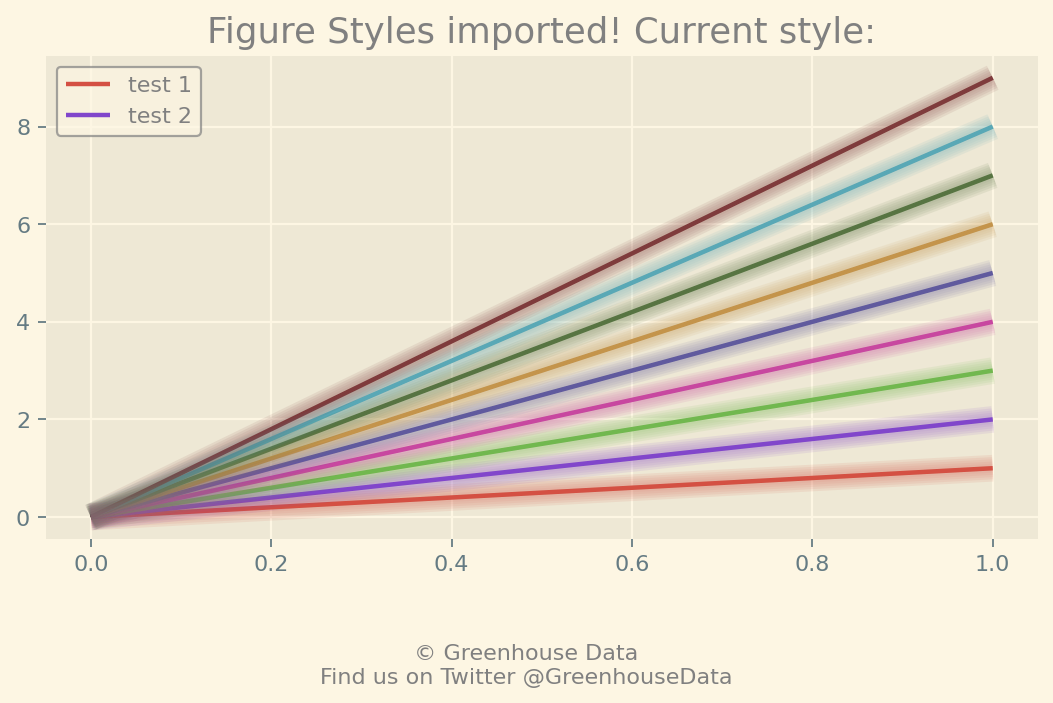

styles imported!


In [2]:
%run Figure_Styles.ipynb

# Random Fig

In [3]:
random_country_dir = random.choice(os.listdir("../country_data"))
random_country_dir

'CHL_Chile'

In [4]:
figures = glob.glob(f"../country_data/{random_country_dir}/figures/*.png", recursive = True)
figures

['../country_data/CHL_Chile/figures/CHL_CAIT_gases_1.png',
 '../country_data/CHL_Chile/figures/CHL_Minx_top20_subsectors.png',
 '../country_data/CHL_Chile/figures/CHL_CO2_totals.png',
 '../country_data/CHL_Chile/figures/CHL_GCP_Country_Highlight.png',
 '../country_data/CHL_Chile/figures/CHL_EIA_1.png',
 '../country_data/CHL_Chile/figures/CHL_IEA_1.png',
 '../country_data/CHL_Chile/figures/CHL_GCP_1.png',
 '../country_data/CHL_Chile/figures/CHL_UNFCCC_NAI_1.png',
 '../country_data/CHL_Chile/figures/CHL_BP_1.png',
 '../country_data/CHL_Chile/figures/CHL_CAIT_lucf_vs_nolucf.png',
 '../country_data/CHL_Chile/figures/CHL_CDIAC_1.png']

In [5]:
random_fig = random.choice(figures)
random_fig

'../country_data/CHL_Chile/figures/CHL_CO2_totals.png'

In [6]:
shutil.copyfile(random_fig, "../supplemental/random_daily_fig.png",)

'../supplemental/random_daily_fig.png'

In [7]:
print("random_fig path imported")

random_fig path imported


# Update NOAA Data & Graph

## Get data

### CO2

In [8]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv"
df_co2_raw_txt = pd.read_fwf("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv")
file_creation_date = list(df_co2_raw_txt.iloc[:,0])[20]

# If there is an update, read and create new CSV
update_df = pd.read_csv("noaa-updates.csv")
CO2_UPDATE = False
if file_creation_date != update_df["co2"].values[0]:
    print(file_creation_date)
    
    df_co2_raw = pd.read_csv(url, header=47)

    # add datetime columns
    df_co2 = df_co2_raw

    df_co2["date"] = np.nan
    for i,j in enumerate(df_co2.index):
        df_co2.loc[j,"date"] = str(int(df_co2.loc[j].year)) + "-" + str(int(df_co2.loc[j].month)) + "-" + str(int(df_co2.loc[j].day)) 
    df_co2["date"] = pd.to_datetime(df_co2["date"]) #, format = "%Y-%m-%d", yearfirst=True

    #drop
    df_co2 = df_co2[df_co2.average > -998]

        # save new df
    df_co2.to_csv("../clean_data/NOAA_CO2.csv", index=None)
    
    # update "update_df" creation dates
    update_df.loc[0, "co2"] = file_creation_date
    display(update_df)
    update_df.to_csv("noaa-updates.csv", index=None)
    
    CO2_UPDATE = True

print("NEW UPDATES: ", CO2_UPDATE)

NEW UPDATES:  False


### CH4

In [9]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt"
df_ch4_raw_txt = pd.read_fwf(url)
file_creation_date = df_ch4_raw_txt.iloc[:,-1][20]


# If there is an update, read and create new CSV
update_df = pd.read_csv("noaa-updates.csv")
CH4_UPDATE = False
if file_creation_date != update_df["ch4"].values[0]:
    print(file_creation_date)

    df_ch4_raw = pd.read_csv(url, delim_whitespace=True, header = 62)


    #fix columns
    df_ch4 = df_ch4_raw
    wrong_columns = df_ch4.columns
    df_ch4 = df_ch4.drop("trend_unc", axis=1)
    df_ch4 = df_ch4.rename(dict(zip(df_ch4.columns, wrong_columns[1:])), axis=1)

    # add datetime columns
    df_ch4["date"] = np.nan
    for i,j in enumerate(df_ch4.index):
        df_ch4.loc[j,"date"] = str(int(df_ch4.loc[j].year)) + "-" + str(int(df_ch4.loc[j].month)) 
    df_ch4["date"] = pd.to_datetime(df_ch4["date"]) #, format = "%Y-%m-%d", yearfirst=True

    #drop
    df_ch4 = df_ch4[df_ch4.average > -998]

    # save new df
    df_ch4.to_csv("../clean_data/NOAA_CH4.csv", index=None)
    
    # update "update_df" creation dates
    update_df.loc[0, "ch4"] = file_creation_date
    
    
    CH4_UPDATE = True
    
print("NEW UPDATES: ", CH4_UPDATE)

File Creation: Tue Jul  5 04:05:04 2022
NEW UPDATES:  True


### N2O

In [10]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/n2o/n2o_mm_gl.txt"
df_n2o_raw_txt = pd.read_fwf(url)
file_creation_date = df_n2o_raw_txt.iloc[:,-1][20]

# If there is an update, read and create new CSV
update_df = pd.read_csv("noaa-updates.csv")
N2O_UPDATE = False
if file_creation_date != update_df["n2o"].values[0]:
    print(file_creation_date)
    df_n2o_raw = pd.read_csv(url, delim_whitespace=True, header = 62)

    #fix columns
    df_n2o = df_n2o_raw
    wrong_columns = df_n2o.columns
    df_n2o = df_n2o.drop("trend_unc", axis=1)
    df_n2o = df_n2o.rename(dict(zip(df_n2o_raw.columns, wrong_columns[1:])), axis=1)


    # add datetime columns
    df_n2o["date"] = np.nan
    for i,j in enumerate(df_n2o.index):
        df_n2o.loc[j,"date"] = str(int(df_n2o.loc[j].year)) + "-" + str(int(df_n2o.loc[j].month)) 
    df_n2o["date"] = pd.to_datetime(df_n2o["date"]) #, format = "%Y-%m-%d", yearfirst=True

    #drop
    df_n2o = df_n2o[df_n2o.average > -998]

    # save new df
    df_n2o.to_csv("../clean_data/NOAA_N2O.csv", index=None)

    # update "update_df" creation dates
    update_df.loc[0, "n2o"] = file_creation_date
    update_df.to_csv("noaa-updates.csv", index=None)
    
    N2O_UPDATE = True

print("NEW UPDATES: ", N2O_UPDATE)

NEW UPDATES:  False


## Graph

In [11]:
# FOR NEW AUTOMATIC UPDATES:
UPDATE = False
if CO2_UPDATE or CH4_UPDATE or N2O_UPDATE == True:
    df_ch4 = pd.read_csv("../clean_data/NOAA_CH4.csv")
    df_co2 = pd.read_csv("../clean_data/NOAA_CO2.csv")
    df_n2o = pd.read_csv("../clean_data/NOAA_N2O.csv")
    
    UPDATE = True
    print("UPDATE SET AS TRUE")
else:
    print("No update")

UPDATE SET AS TRUE


In [12]:
# # FOR MANUAL UPDATES, silence all when finished:
# df_ch4 = pd.read_csv("../clean_data/NOAA_CH4.csv")
# df_co2 = pd.read_csv("../clean_data/NOAA_CO2.csv")
# df_n2o = pd.read_csv("../clean_data/NOAA_N2O.csv")
# UPDATE = True
# df_co2.tail(20)

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


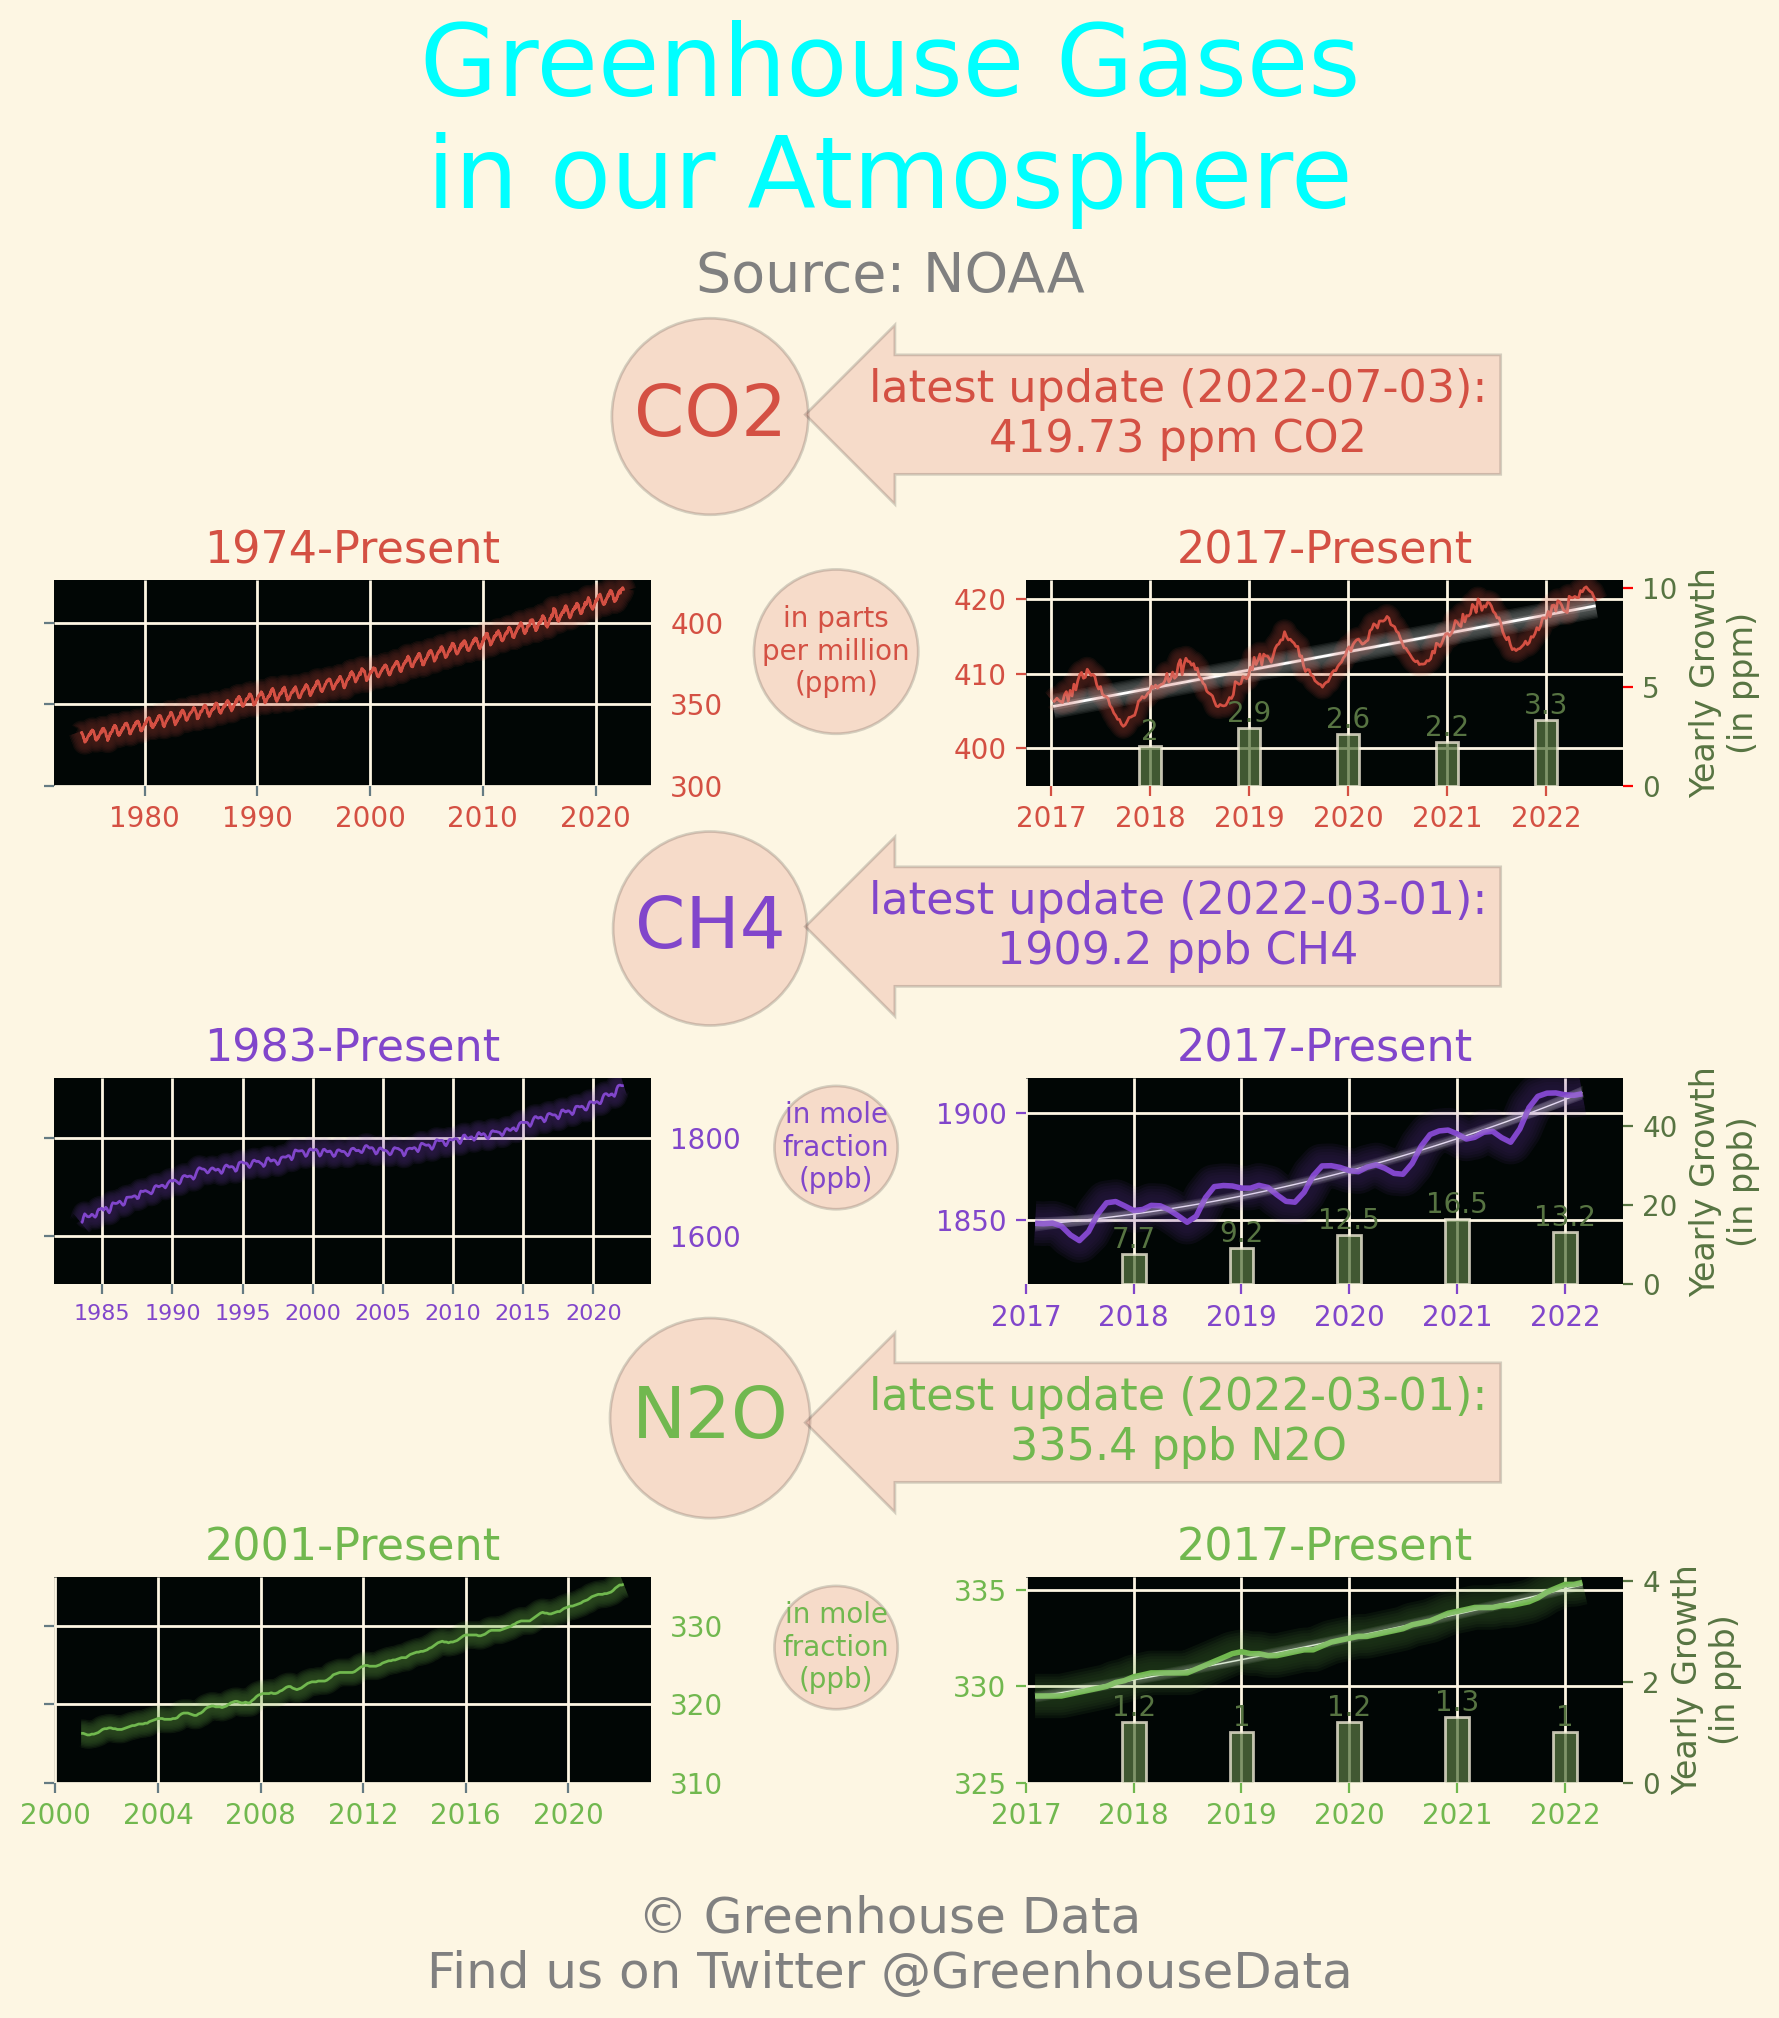

In [13]:

if UPDATE ==True:
    
    start_year = 2017
    lw_l = 1
    lw_r = 1

    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_cycle


    ##

    fig, axs = plt.subplots(3,2, figsize=(9,8), dpi=200)
    axs = axs.flatten()

    fig.suptitle("Greenhouse Gases\nin our Atmosphere", fontsize=36, color="cyan", y=1.15)
    fig.text(x=.5, y=.98, s="Source: NOAA", ha="center", fontsize=20)





    # CO2 - left
    df_co2["date"] = pd.to_datetime(df_co2["date"])
    ax_co2 = axs[0]
    ax_co2.set_title("1974-Present", color= color_cycle[0])
    ax_co2.plot(df_co2.date, df_co2.average, color= color_cycle[0], lw=lw_l,zorder=5)

    # ax_co2.set_xlabel("year", color= color_cycle[0])
    ax_co2.set_ylim(bottom=300)
    ax_co2.set_ylabel("", color = color_cycle[0], rotation="horizontal", labelpad=70, ha="center", va="top")
    ax_co2.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[0])
    ax_co2.yaxis.set_label_position("right")

    # CO2 ZOOM
    df_co2_zoom = df_co2[df_co2.date > datetime(start_year,1,1)]

    ax_co2_zoom = axs[1]
    ax_co2_zoom.set_title(f"{str(start_year)}-Present", color= color_cycle[0])
    line = ax_co2_zoom.plot(df_co2_zoom.date, df_co2_zoom.average, color= color_cycle[0], lw=lw_r)

    sns.regplot(x=df_co2_zoom.date.apply(date2num), y=df_co2_zoom.average, ax=ax_co2_zoom, 
                scatter=False,dropna=True, color="w", line_kws={"zorder":0, "lw":lw_r})


    ax_co2_zoom.set_xlabel("", color= color_cycle[0])
    # ax_co2_zoom.set_xlim(left=datetime(start_year,1,1), right=datetime.now())
    ax_co2_zoom.set_ylim(bottom=395)
    ax_co2_zoom.set_ylabel("", color = color_cycle[0])
    ax_co2_zoom.tick_params(labelleft = True, labelright=False, labelcolor = color_cycle[0], color=color_cycle[0])
    ax_co2_zoom.yaxis.set_label_position("right")

    growth = df_co2_zoom.groupby("year").mean().diff()
    growth.index = pd.to_datetime(growth.index, format = "%Y", yearfirst=True)
    twax_co2_zoom = ax_co2_zoom.twinx()
    twax_co2_zoom.grid(False)
    gbar = twax_co2_zoom.bar(x=growth.index, height= growth.average.round(1), width=80, color=color_cycle[6], edgecolor=fig.get_facecolor(), alpha=.75)
    twax_co2_zoom.bar_label(gbar, color=color_cycle[6])
    twax_co2_zoom.set_ylim(top = twax_co2_zoom.get_ylim()[1]*3)
    twax_co2_zoom.set_ylabel("Yearly Growth\n(in ppm)", color=color_cycle[6])
    twax_co2_zoom.tick_params(labelcolor=color_cycle[6], color="r")












    # CH4 - LEFT
    df_ch4["date"] = pd.to_datetime(df_ch4["date"])
    ax_ch4 = axs[2]
    ax_ch4.set_title("1983-Present", color= color_cycle[1])
    ax_ch4.plot(df_ch4.date, df_ch4.average, color= color_cycle[1], lw=lw_l)

    # ax_ch4.set_xlabel("year", color= color_cycle[1])
    ax_ch4.set_ylim(bottom=1500)
    ax_ch4.set_ylabel("", color = color_cycle[1])
    ax_ch4.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[1])
    ax_ch4.tick_params("x", labelsize=8)
    ax_ch4.yaxis.set_label_position("right")


    # CH4 ZOOM
    df_ch4_zoom = df_ch4[df_ch4.date > datetime(start_year,1,1)]

    ax_ch4_zoom = axs[3]
    ax_ch4_zoom.set_title(f"{str(start_year)}-Present", color= color_cycle[1])
    ax_ch4_zoom.plot(pd.to_datetime(df_ch4_zoom.date), df_ch4_zoom.average, color= color_cycle[1], lw=lw_r+1)
    sns.regplot(x=df_ch4_zoom.date.apply(date2num), y=df_ch4_zoom.average, ax=ax_ch4_zoom, 
                scatter=False,dropna=True, color="w", line_kws={"zorder":0, "lw":lw_r-.5}, order=2)

    ax_ch4_zoom.set_xlabel("", color= color_cycle[1])
    ax_ch4_zoom.set_xlim(left=datetime(start_year,1,1), right=datetime.now())
    ax_ch4_zoom.set_ylim(bottom=1820)
    ax_ch4_zoom.set_ylabel("ff", color = color_cycle[1])
    ax_ch4_zoom.tick_params(labelleft = True, labelright=False, labelcolor = color_cycle[1], color=color_cycle[1])
    ax_ch4_zoom.yaxis.set_label_position("right")
    ax_ch4_zoom.set_ylabel("", color = color_cycle[1])

    growth = df_ch4_zoom.groupby("year").mean().diff()
    growth.index = pd.to_datetime(growth.index, format = "%Y", yearfirst=True)
    twax_ch4_zoom = ax_ch4_zoom.twinx()
    twax_ch4_zoom.grid(False)
    gbar = twax_ch4_zoom.bar(x=growth.index, height= growth.average.round(1), width=80, color=color_cycle[6], edgecolor=fig.get_facecolor(), alpha=.75)
    twax_ch4_zoom.bar_label(gbar, color=color_cycle[6])
    twax_ch4_zoom.set_ylim(top = twax_ch4_zoom.get_ylim()[1]*3)
    twax_ch4_zoom.set_ylabel("Yearly Growth\n(in ppb)", color=color_cycle[6])
    twax_ch4_zoom.tick_params(labelcolor=color_cycle[6], color=color_cycle[6])





    # N2O - LEFT
    df_n2o["date"] = pd.to_datetime(df_n2o["date"])
    ax_n2o = axs[4]
    ax_n2o.set_title("2001-Present", color= color_cycle[2])
    ax_n2o.plot(df_n2o.date, df_n2o.average, color= color_cycle[2], lw=lw_l)

    # ax_n2o.set_xlabel("year", color= color_cycle[2])
    ax_n2o.set_ylim(bottom=310)
    ax_n2o.set_ylabel("", color = color_cycle[2])
    ax_n2o.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[2])
    ax_n2o.yaxis.set_label_position("right")


    # N2O - zoom
    df_n2o_zoom = df_n2o[df_n2o.date > datetime(start_year,1,1)]

    ax_n2o_zoom = axs[5]
    ax_n2o_zoom.set_title(f"{str(start_year)}-Present", color= color_cycle[2])
    ax_n2o_zoom.plot(df_n2o_zoom.date, df_n2o_zoom.average, color = color_cycle[2], lw=lw_r+1)
    sns.regplot(x=df_n2o_zoom.date.apply(date2num), y=df_n2o_zoom.average, ax=ax_n2o_zoom, 
                scatter=False,dropna=True, color="w", line_kws={"zorder":0, "lw":lw_r-.5}, order=2)

    ax_n2o_zoom.set_xlabel("", color= color_cycle[2])
    ax_n2o_zoom.set_xlim(left=datetime(start_year,1,1), right=datetime.now())
    ax_n2o_zoom.set_ylim(bottom=325)
    ax_n2o_zoom.tick_params(labelleft = True, labelright=False, labelcolor = color_cycle[2], color=color_cycle[2])
    ax_n2o_zoom.yaxis.set_label_position("right")
    ax_n2o_zoom.set_ylabel("", color = color_cycle[2])

    growth = df_n2o_zoom.groupby("year").mean().diff()
    growth.index = pd.to_datetime(growth.index, format = "%Y", yearfirst=True)
    twax_n2o_zoom = ax_n2o_zoom.twinx()
    twax_n2o_zoom.grid(False)
    gbar = twax_n2o_zoom.bar(x=growth.index, height= growth.average.round(1), width=80, color=color_cycle[6], edgecolor=fig.get_facecolor(), alpha=.75)
    twax_n2o_zoom.bar_label(gbar, color=color_cycle[6])
    twax_n2o_zoom.set_ylim(top = twax_n2o_zoom.get_ylim()[1]*3)
    twax_n2o_zoom.set_ylabel("Yearly Growth\n(in ppb)", color=color_cycle[6])
    twax_n2o_zoom.tick_params(labelcolor=color_cycle[6], color=color_cycle[6])





    for i in range(6):
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_facecolor("#010605")

    for i in [twax_co2_zoom, twax_ch4_zoom, twax_n2o_zoom]:
        i.spines['top'].set_visible(False)
        i.spines['bottom'].set_visible(False)
        i.spines['right'].set_visible(False)
        i.spines['left'].set_visible(False)




    # Circles!
    pad = .08
    x=.4
    fig.text(x=x, y=0.97 - pad, s="CO2", ha="center", color=color_cycle[0], bbox={"alpha": .16, "boxstyle": "circle"}, fontsize=26)
    fig.text(x=x, y=0.65 - pad, s="CH4", ha="center", color=color_cycle[1], bbox={"alpha": .16, "boxstyle": "circle"}, fontsize=26)
    fig.text(x=x, y=0.344 - pad, s="N2O", ha="center", color=color_cycle[2], bbox={"alpha": .16, "boxstyle": "circle"}, fontsize=26)

    x2 = .66
    fig.text(x=x2, y=0.96 - pad, s=f"latest update ({df_co2.date.iloc[-1].date()}):\n{df_co2.average.iloc[-1]} ppm CO2", ha="center", color=color_cycle[0], bbox={"alpha": .16, "boxstyle": "larrow"}, fontsize=16)
    fig.text(x=x2, y=0.64 - pad, s=f"latest update ({df_ch4.date.iloc[-1].date()}):\n{df_ch4.average.iloc[-1]} ppb CH4", ha="center", color=color_cycle[1], bbox={"alpha": .16, "boxstyle": "larrow"}, fontsize=16)
    fig.text(x=x2, y=0.33 - pad, s=f"latest update ({df_n2o.date.iloc[-1].date()}):\n{df_n2o.average.iloc[-1]} ppb N2O", ha="center", color=color_cycle[2], bbox={"alpha": .16, "boxstyle": "larrow"}, fontsize=16)

    x3 = .47
    fig.text(x=x3, y = .81 - pad,s = "in parts\nper million\n(ppm)", ha="center", color = color_cycle[0], bbox={"alpha":.16, "boxstyle":"circle"})
    fig.text(x=x3, y = .50 - pad,s = "in mole\nfraction\n(ppb)", ha="center", color = color_cycle[1], bbox={"alpha":.16, "boxstyle":"circle"})
    fig.text(x=x3, y = .1875 - pad,s = "in mole\nfraction\n(ppb)", ha="center", color = color_cycle[2], bbox={"alpha":.16, "boxstyle":"circle"})




    NEONIZE(ax_co2, 9)
    NEONIZE(ax_ch4, 9)
    NEONIZE(ax_co2_zoom, 9)
    NEONIZE(ax_n2o, 10)
    NEONIZE(ax_ch4_zoom, 8)
    NEONIZE(ax_n2o_zoom, 8)

    add_GreenhouseData_trademark(fig, fontsize=18, y=-.08)

    fig.tight_layout(h_pad = 7, w_pad = 7)
   
    fig.savefig("../global/NOAA_summary", bbox_inches="tight")